### QED-C Application-Oriented Benchmarks - Qiskit - Hydrogen Lattice

The notebook contains specific examples for the Hydrogen Lattice benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

In [1]:
min_qubits=2
max_qubits=16
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples create a provider instance and get a backend from it

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

import sys
sys.path.insert(1, "../../")

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })

##################
# Addition options for exploring Hydrogen Lattice

import sys
sys.path.insert(1, "../../_common")
sys.path.insert(1, "../../_common/qiskit")

# Set these True to enable verbose and verbose_time execution
import execute
execute.verbose=False
execute.verbose_time=False

# Set noise model to None.  This way the Sampler version uses same noise model as Estimator version
execute.noise=None

# Appendage for storing the data files and identifying the plots
import metrics
metrics.data_suffix=""


### Hydrogen Lattice - Method 1 - Fidelity of Ansatz

This benchmark is similar to benchmarks at the top-level in that it executes a quantum circuit to measure its fidelity of execution on a specific backend system.
Here, the circuit tested is a pUCCD ansatz used in a quantum simulation of a hydrogen lattice.

Hydrogen Lattice (1) Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Oct 03, 2024 06:50:59 UTC
************
Executing [1] circuits for num_qubits = 2
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Executing [1] circuits for num_qubits = 8
************
Executing [1] circuits for num_qubits = 10
************
Executing [1] circuits for num_qubits = 12
************
Executing [1] circuits for num_qubits = 14
************
Executing [1] circuits for num_qubits = 16
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.004, 0.847, 0.002 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0



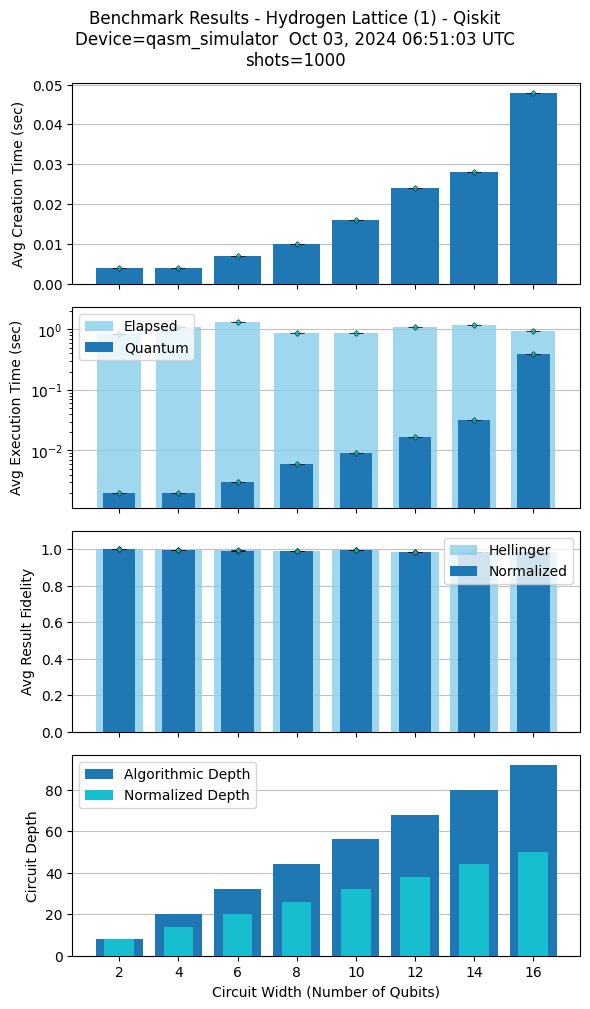

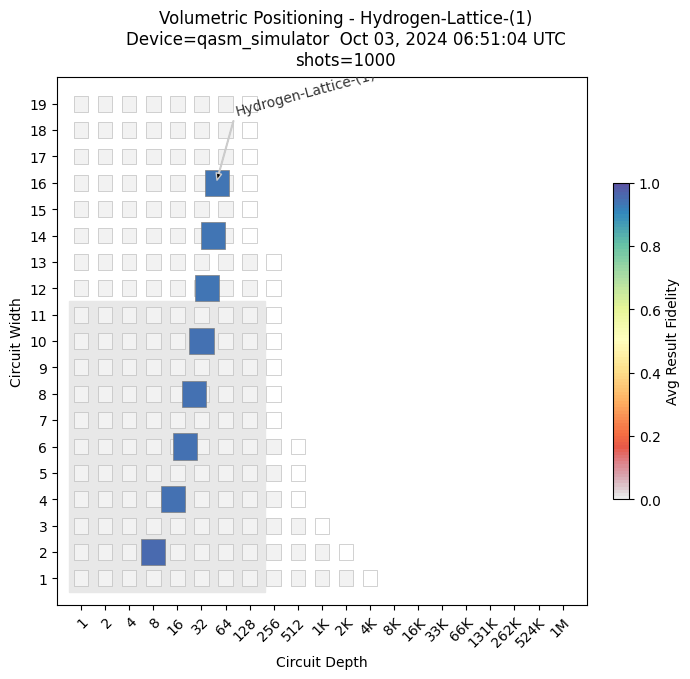

In [3]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# Arguments applicable to Hydrogen Lattice benchmark method (1)
hl_app_args = dict(
    
    radius=0.75,                # select single problem radius, None = use max_circuits problem
    
    thetas_array=None,          # specify a custom thetas_array
    parameter_mode=1,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    parameterized=True,        # use Parameter objects in circuit, cache transpiled circuits for performance
    use_estimator=False,        # use the Estimator for execution of objective function
)

# Run the benchmark in method 1
hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)


### Hydrogen Lattice - Method 2 - Energy as Objective Function

This method executes the benchmark as a Variational Quantum Eigensolver (VQE) that uses the ansatz tested in method (1).


Hydrogen Lattice (2) Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Oct 03, 2024 06:51:06 UTC
************
Executing [1] restarts for num_qubits = 2

.................
Classically Computed Energies from solution file for 2 qubits and radius 0.75
  DOCI calculated energy : -1.1371170673457325
  FCI calculated energy : -1.1371170673457325
  Hartree-Fock calculated energy : -1.1161514489386022
  Random Solution calculated energy : 0.23161540155929444
Computed Energies for 2 qubits and radius 0.75
  Solution Energy : -1.1377653874986924
  Accuracy Ratio : 0.9995263353740131, Solution Quality : 0.9998185176228241
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.003, 0.034, 0.005 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 

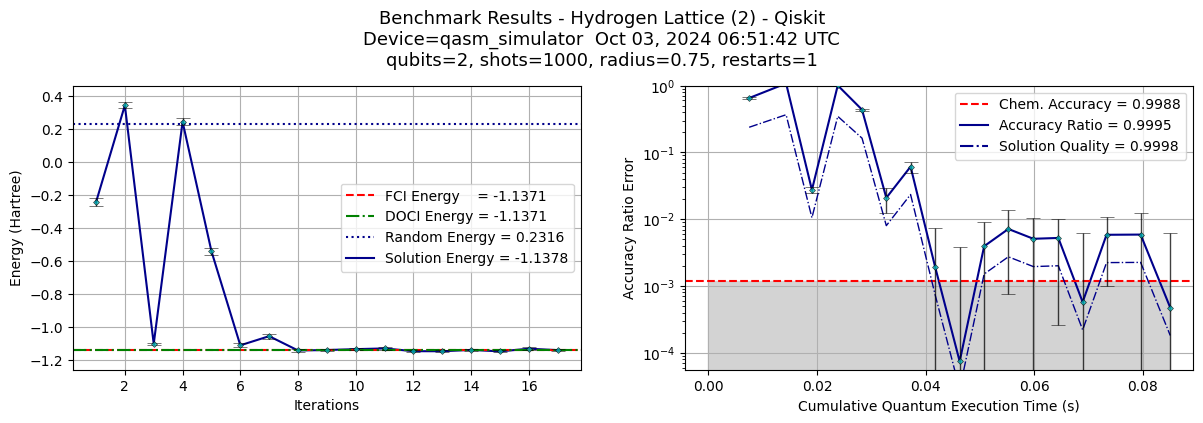

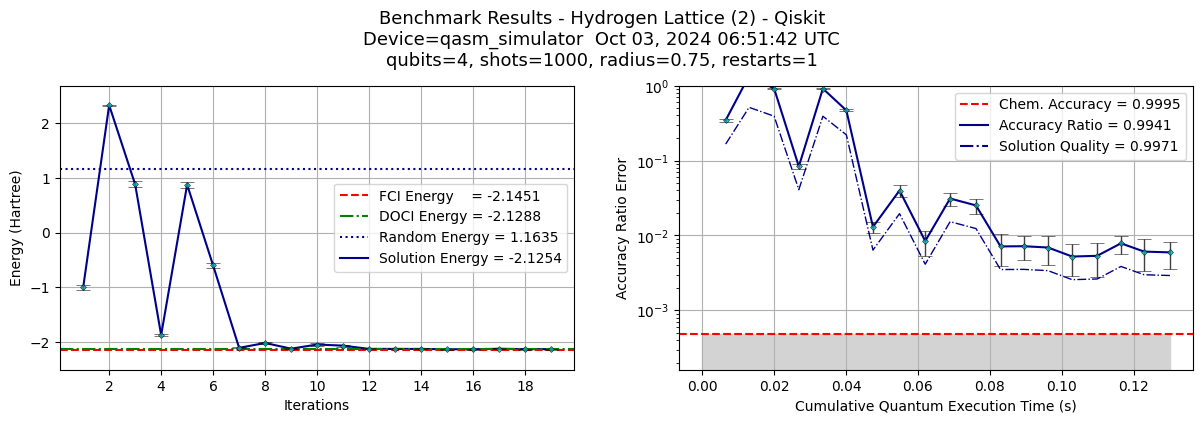

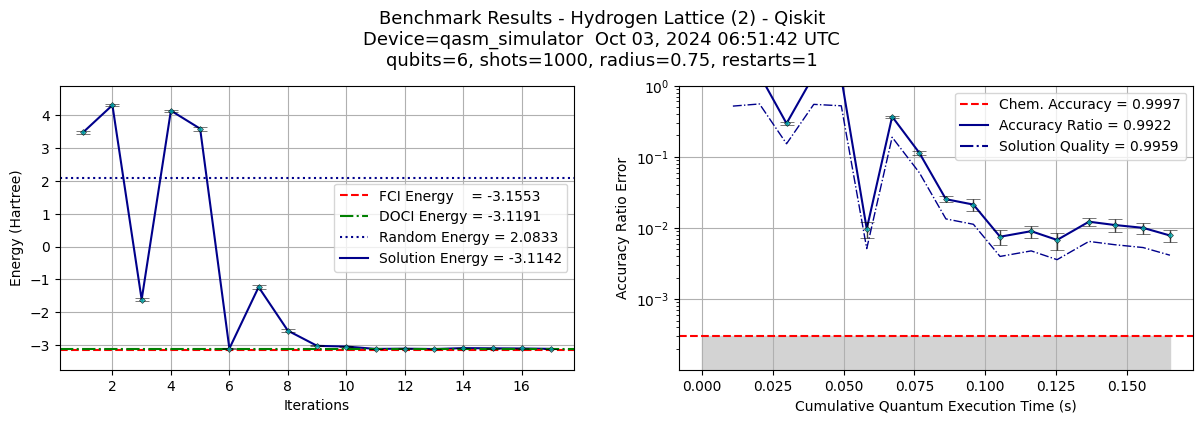

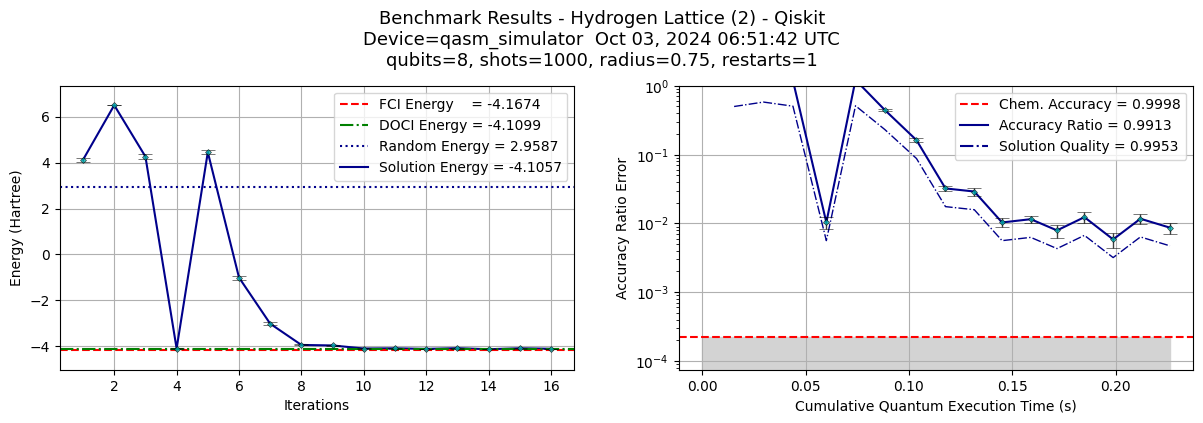

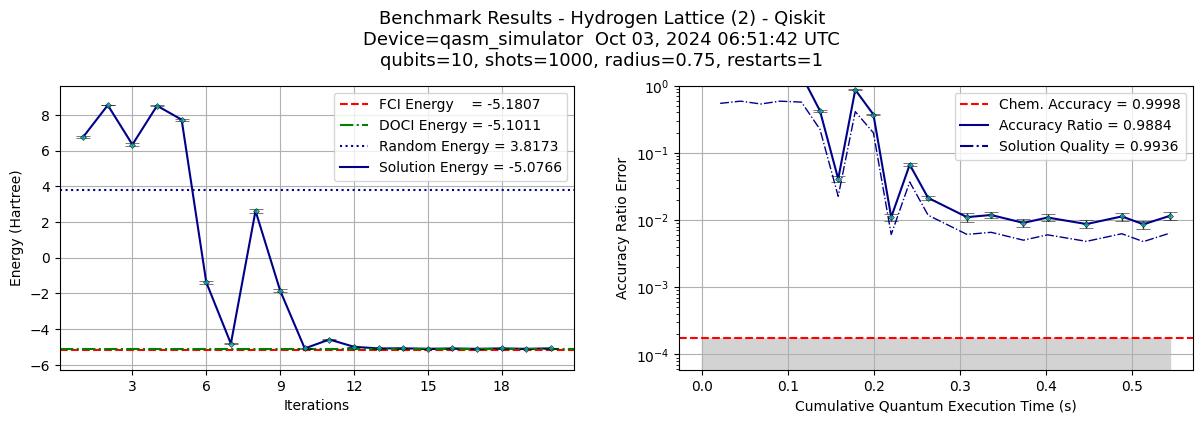

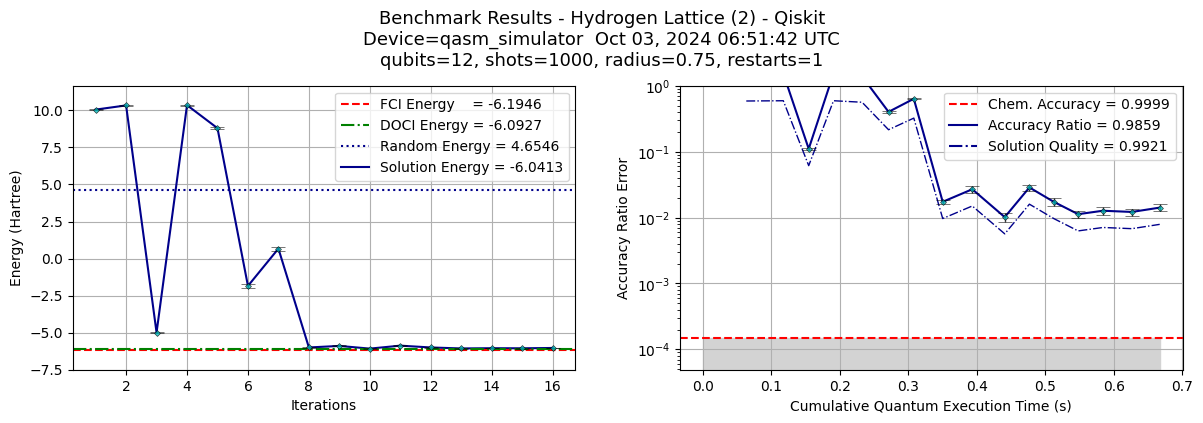

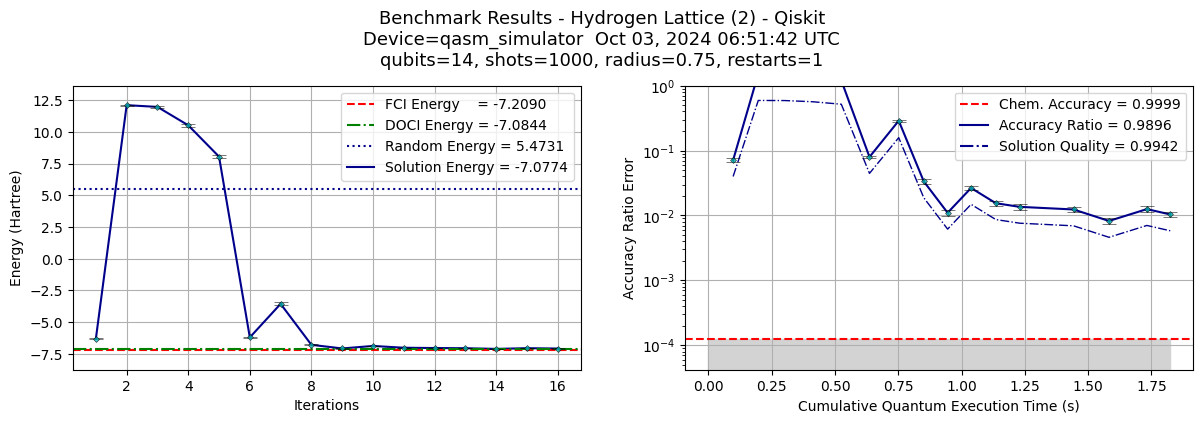

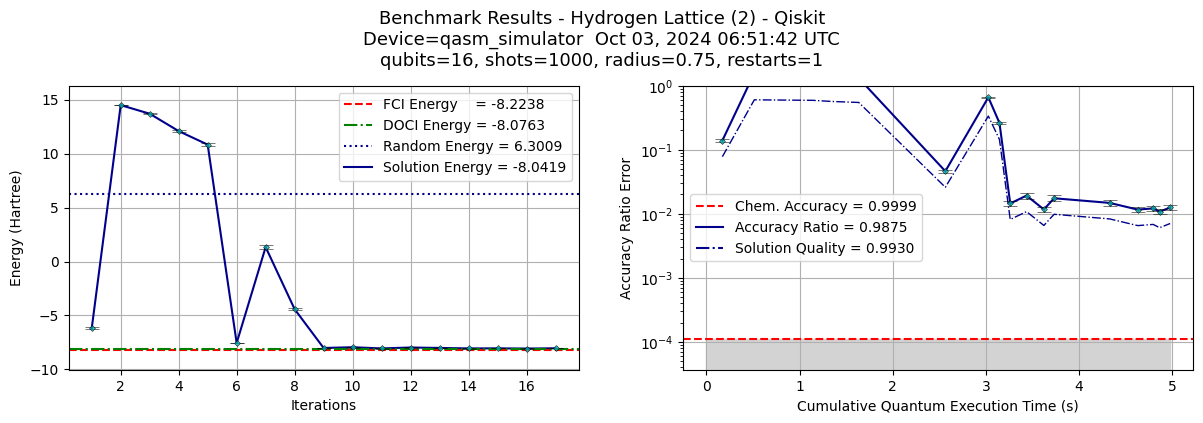

----- Cumulative Plots for all qubit groups -----


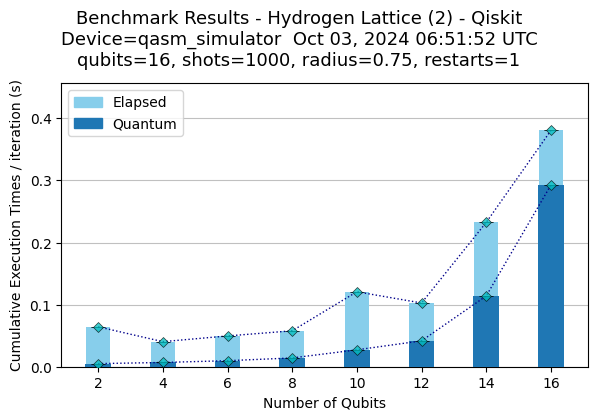

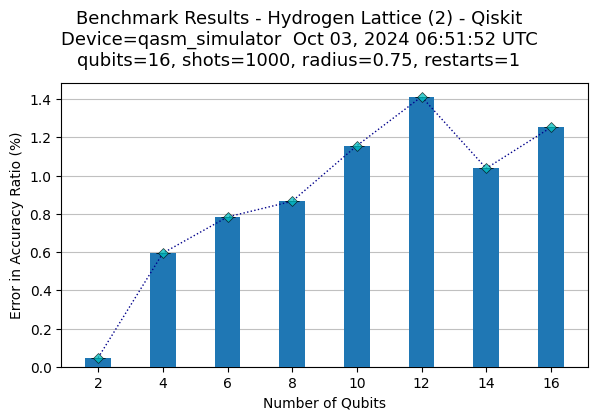

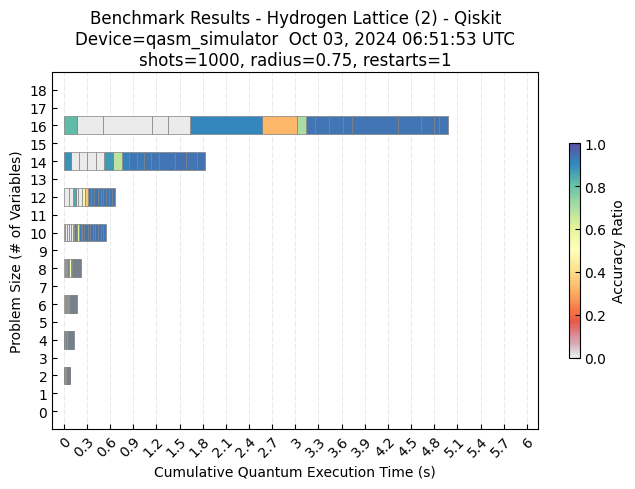

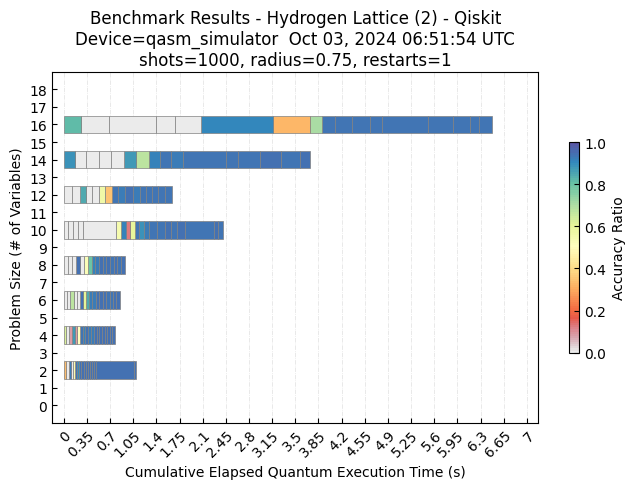

In [4]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# Arguments specific to Hydrogen Lattice benchmark method (2)
hl_app_args = dict(
    
    radius=0.75,                # select single problem radius, None = use max_circuits problems
  
    thetas_array=None,          # specify a custom thetas_array
    parameter_mode=1,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    parameterized=False,        # use Parameter objects in circuit, cache transpiled circuits for performance
    use_estimator=False,        # use the Estimator for execution of objective function
    
    max_iter=30,                # maximum minimizer iterations to perform
    minimizer_tolerance=0.001,  # tolerance passed to the minimizer
    comfort=True,               # show 'comfort dots' during execution
)

# Run the benchmark in method 2
hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)


### Hydrogen Lattice - Method 2 - Energy as Objective Function - using Estimator

This method executes the benchmark as a Variational Quantum Eigensolver (VQE) that uses the ansatz tested in method (1).


Hydrogen Lattice (2) Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Oct 03, 2024 06:51:55 UTC
************
Executing [1] restarts for num_qubits = 2

...............
Classically Computed Energies from solution file for 2 qubits and radius 0.75
  DOCI calculated energy : -1.1371170673457325
  FCI calculated energy : -1.1371170673457325
  Hartree-Fock calculated energy : -1.1161514489386022
  Random Solution calculated energy : 0.23161540155929444
Computed Energies for 2 qubits and radius 0.75
  Solution Energy : -1.1286172169210715
  Accuracy Ratio : 0.9937899840781443, Solution Quality : 0.9976206725751274
************
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.002, 3.183, 3.182 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0, 0

************
Executing [1] restarts for num_qubits = 4

.................
Classically Computed Energies from solution file for 4 qubits and radius 0.75
  DOCI calculated energy : -2

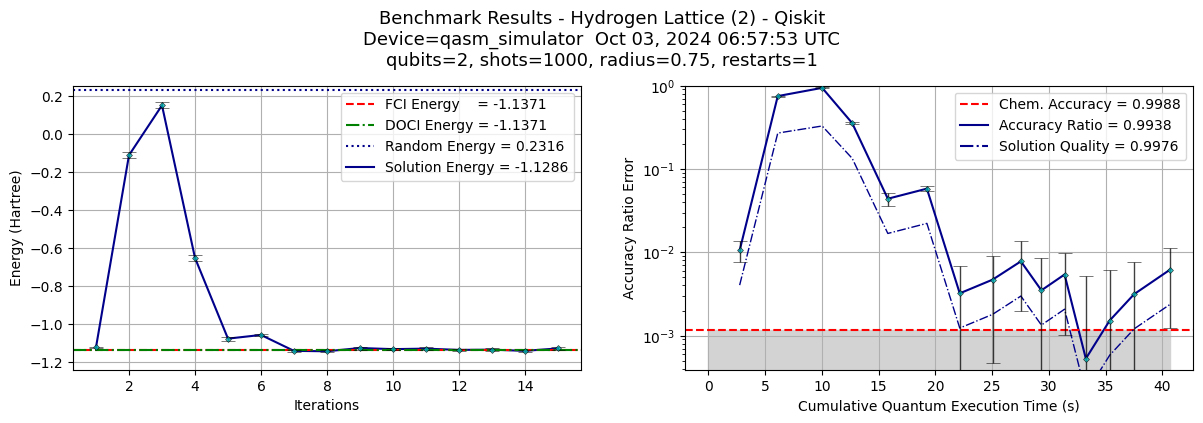

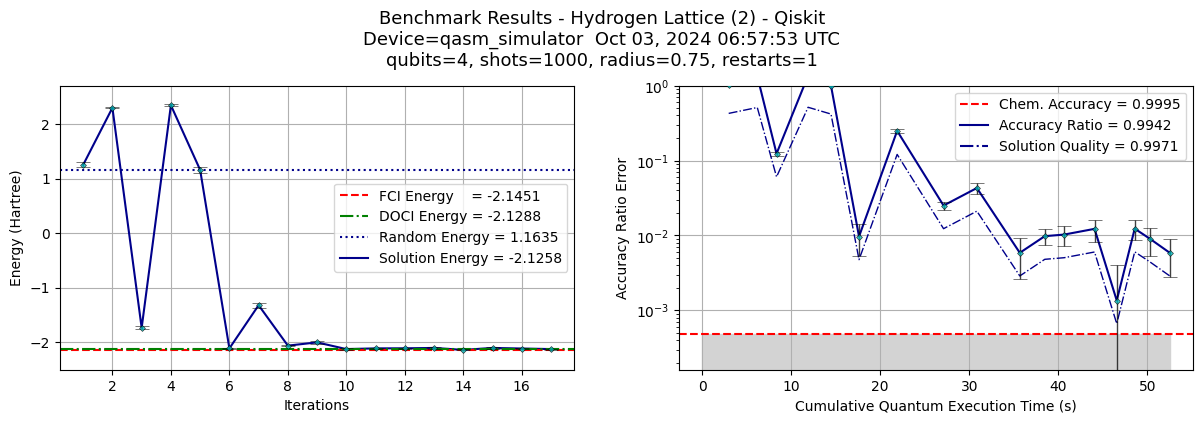

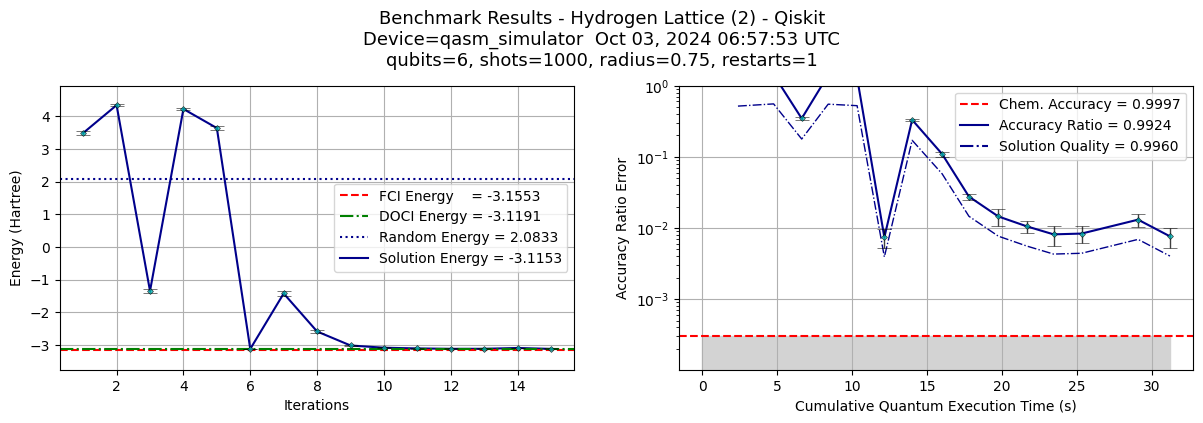

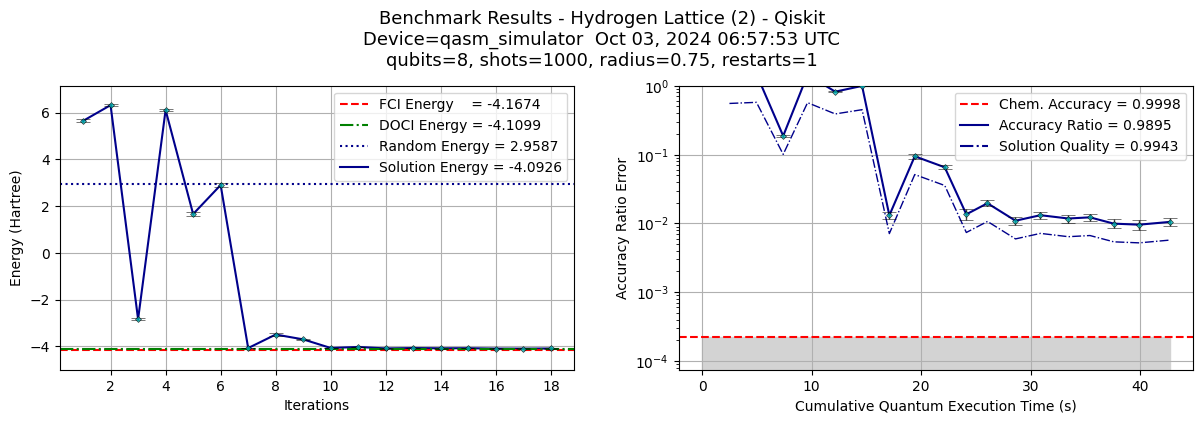

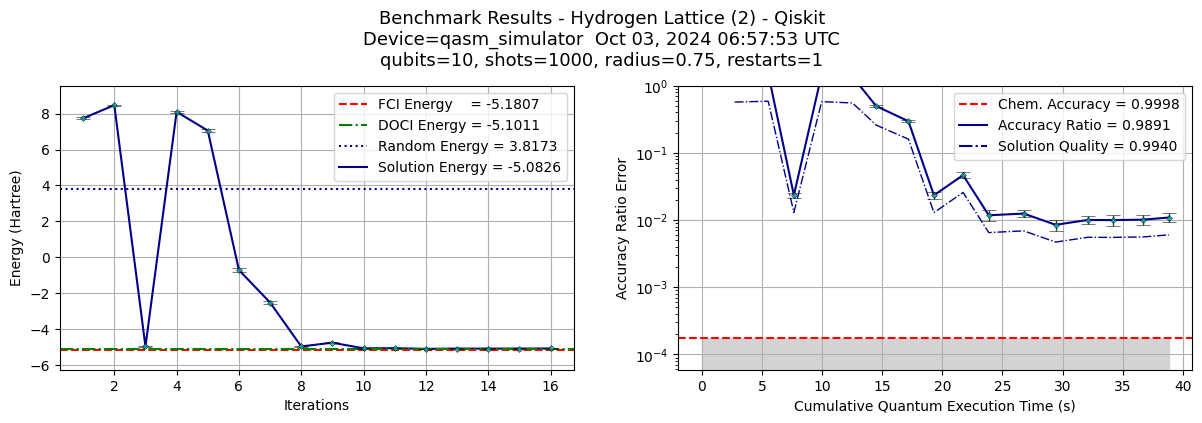

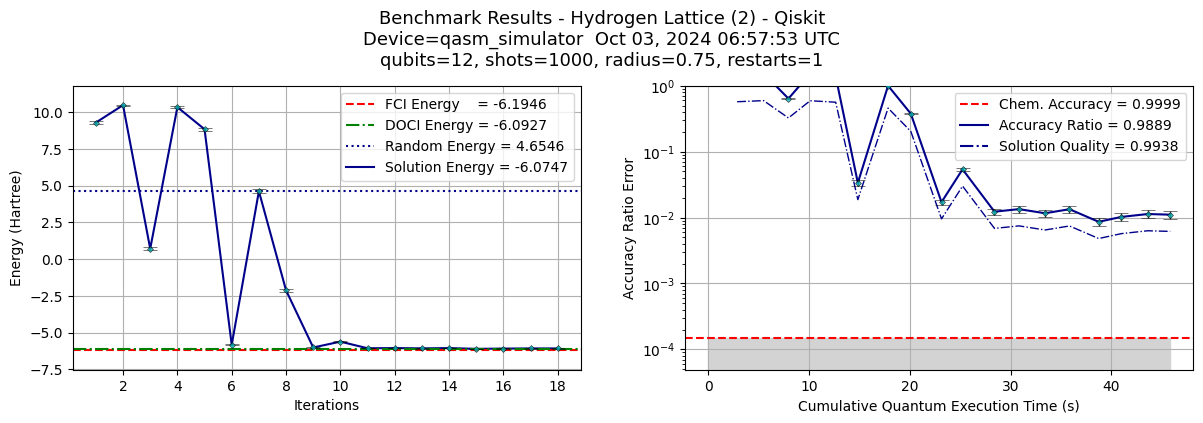

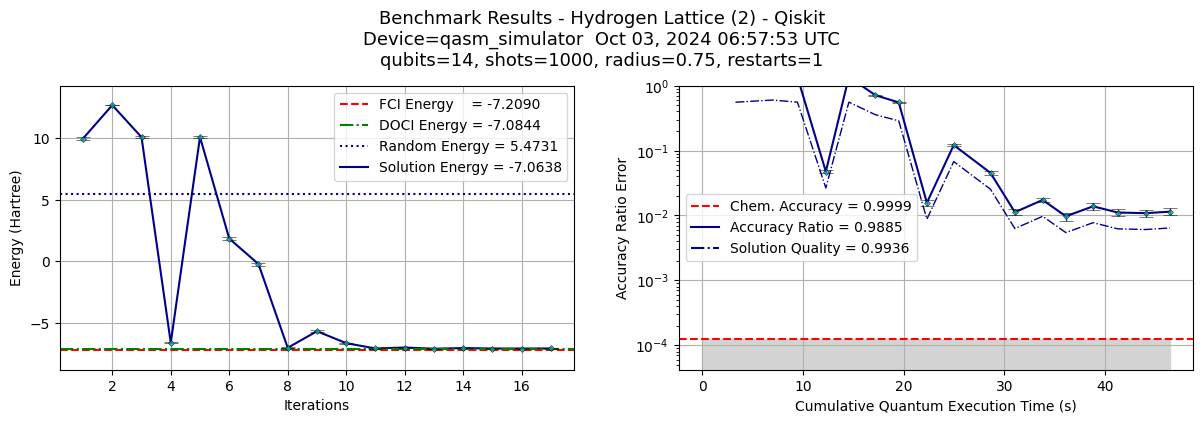

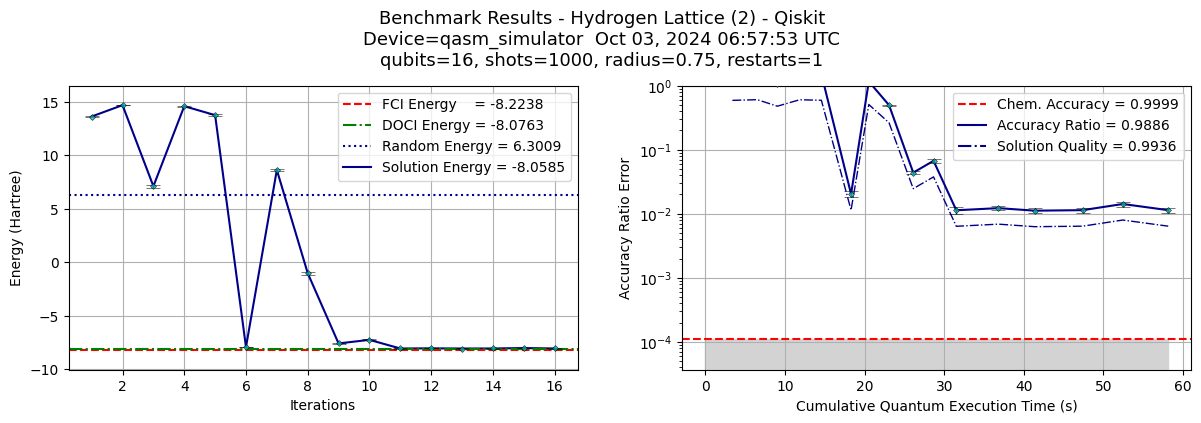

----- Cumulative Plots for all qubit groups -----


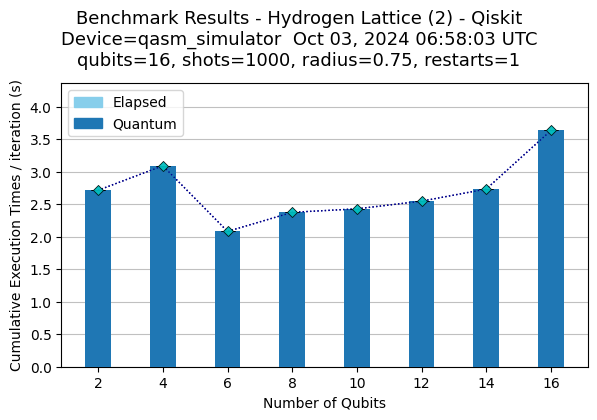

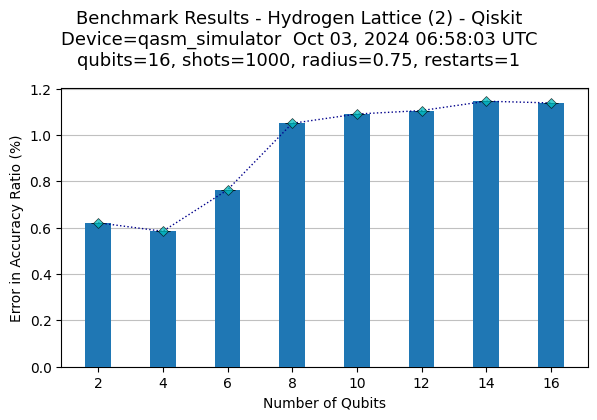

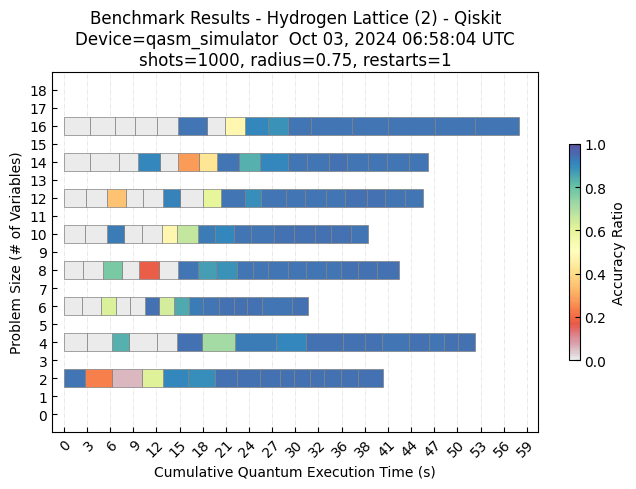

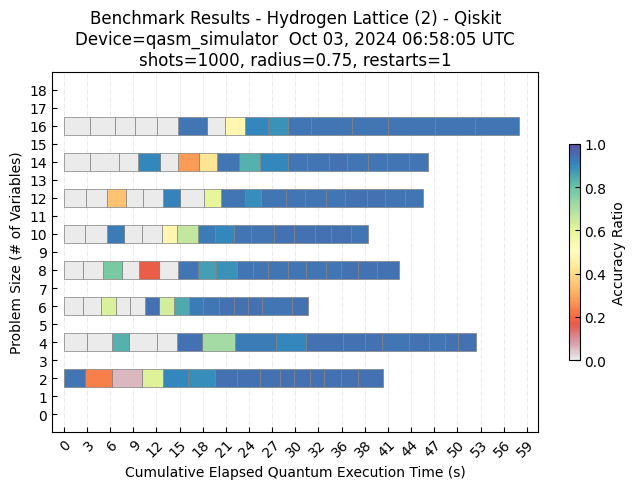

In [5]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# DEVNOTE: Estimator is using no noise by default
import execute
execute.noise = None

# Arguments specific to Hydrogen Lattice benchmark method (2)
hl_app_args = dict(
    
    radius=0.75,                # select single problem radius, None = use max_circuits problems
  
    thetas_array=None,          # specify a custom thetas_array
    parameter_mode=1,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    parameterized=False,        # use Parameter objects in circuit, cache transpiled circuits for performance
    use_estimator=True,         # use the Estimator for execution of objective function
    
    max_iter=30,                # maximum minimizer iterations to perform
    minimizer_tolerance=0.001,  # tolerance passed to the minimizer
    comfort=True,               # show 'comfort dots' during execution
)

# Run the benchmark in method 2
hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)
